# Data 604
## Assignment: Bipartite Networks

## Davis Southern Club Women

Shows how to make unipartite projections of the graph and compute the
properties of those graphs.

These data were collected by Davis et al. in the 1930s.
They represent observed attendance at 14 social events by 18 Southern women.
The graph is bipartite (clubs, women).


Biadjacency matrix
<Compressed Sparse Row sparse array of dtype 'int64'
	with 89 stored elements and shape (18, 14)>
  Coords	Values
  (0, 0)	1
  (0, 1)	1
  (0, 2)	1
  (0, 3)	1
  (0, 4)	1
  (0, 5)	1
  (0, 7)	1
  (0, 8)	1
  (1, 0)	1
  (1, 1)	1
  (1, 2)	1
  (1, 4)	1
  (1, 5)	1
  (1, 6)	1
  (1, 7)	1
  (2, 1)	1
  (2, 2)	1
  (2, 3)	1
  (2, 4)	1
  (2, 5)	1
  (2, 6)	1
  (2, 7)	1
  (2, 8)	1
  (3, 0)	1
  (3, 2)	1
  :	:
  (12, 7)	1
  (12, 8)	1
  (12, 9)	1
  (12, 11)	1
  (12, 12)	1
  (12, 13)	1
  (13, 5)	1
  (13, 6)	1
  (13, 8)	1
  (13, 9)	1
  (13, 10)	1
  (13, 11)	1
  (13, 12)	1
  (13, 13)	1
  (14, 6)	1
  (14, 7)	1
  (14, 9)	1
  (14, 10)	1
  (14, 11)	1
  (15, 7)	1
  (15, 8)	1
  (16, 8)	1
  (16, 10)	1
  (17, 8)	1
  (17, 10)	1

#Friends, Member
17 Evelyn Jefferson
15 Laura Mandeville
17 Theresa Anderson
15 Brenda Rogers
11 Charlotte McDowd
15 Frances Anderson
15 Eleanor Nye
16 Pearl Oglethorpe
17 Ruth DeSand
17 Verne Sanderson
16 Myra Liddel
16 Katherina Rogers
17 Sylvia Avondale
17 Nora Fayette
1

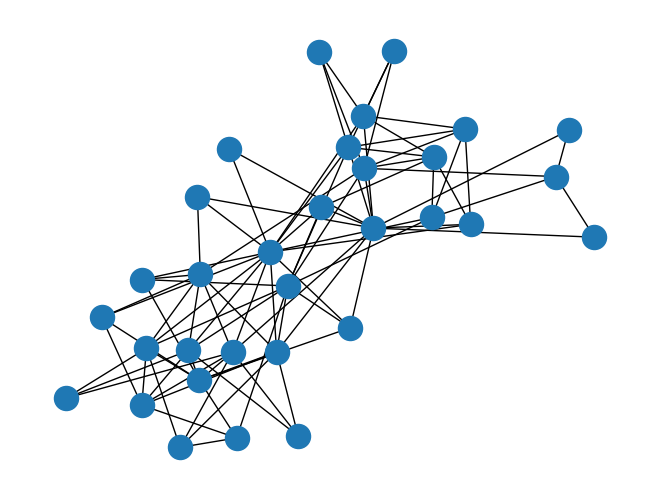

In [4]:
import matplotlib.pyplot as plt
import networkx as nx
from networkx.algorithms import bipartite

G = nx.davis_southern_women_graph()
women = G.graph["top"]
clubs = G.graph["bottom"]

print("Biadjacency matrix")
print(bipartite.biadjacency_matrix(G, women, clubs))

# project bipartite graph onto women nodes
W = bipartite.projected_graph(G, women)
print()
print("#Friends, Member")
for w in women:
    print(f"{W.degree(w)} {w}")

# project bipartite graph onto women nodes keeping number of co-occurrence
# the degree computed is weighted and counts the total number of shared contacts
W = bipartite.weighted_projected_graph(G, women)
print()
print("#Friend meetings, Member")
for w in women:
    print(f"{W.degree(w, weight='weight')} {w}")

pos = nx.spring_layout(G, seed=648)  # Seed layout for reproducible node positions
nx.draw(G, pos)
plt.show()

To better explore the data set I'd like to label the nodes, as well as applying different color codes depending on what type of node it is.

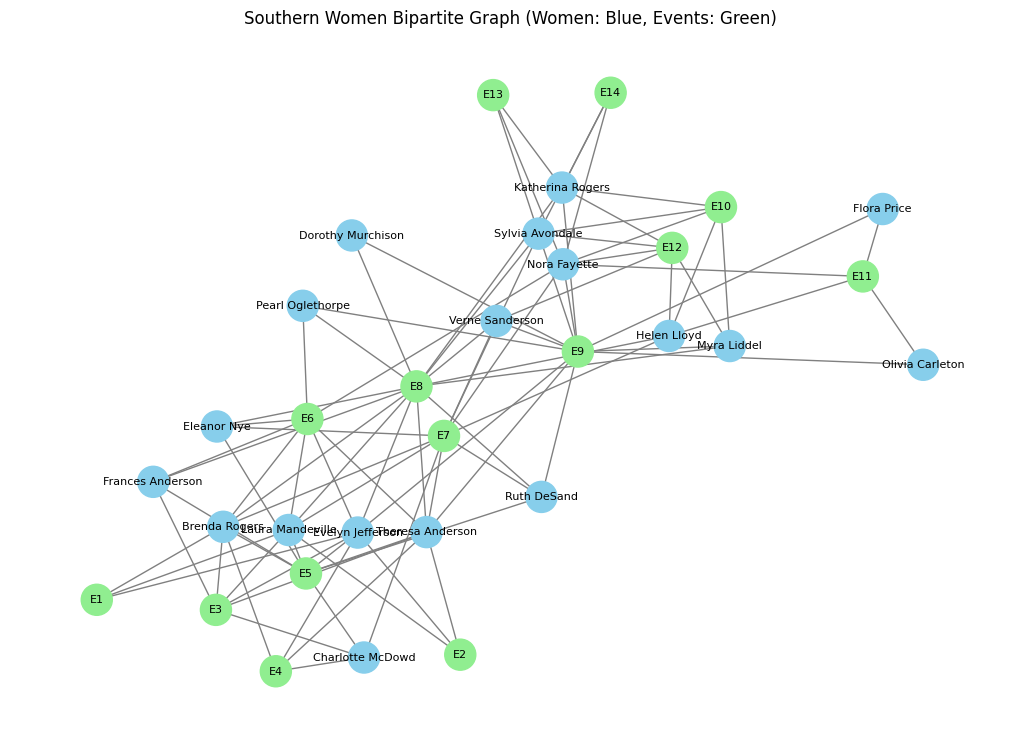

In [3]:
color_map = ["skyblue" if n in women else "lightgreen" for n in G.nodes()]

plt.figure(figsize=(10, 7))
nx.draw(G, pos, labels=labels, node_color=color_map, with_labels=True,
        node_size=500, font_size=8, edge_color='gray')
plt.title("Southern Women Bipartite Graph (Women: Blue, Events: Green)")
plt.show()


Women are represented as blue nodes, and events as green nodes.
We can observe the following:
- Certain events (E5, E6, E7, E8, E9) have more connections,  indicating they were highly attended and potentially central to the women's social network.
- Some women, like Theresa Anderson, Evelyn Jefferson, and Sylvia Avondale, are linked to many of these central events, suggesting they were very active socially.
- A few women such as Olivia Carleton or Flora Price, are connected to fewer events, implying they may be more peripheral in the overall social structure.
- Clusters or groupings of women connected through the same events suggest potential subgroups or friend circles.

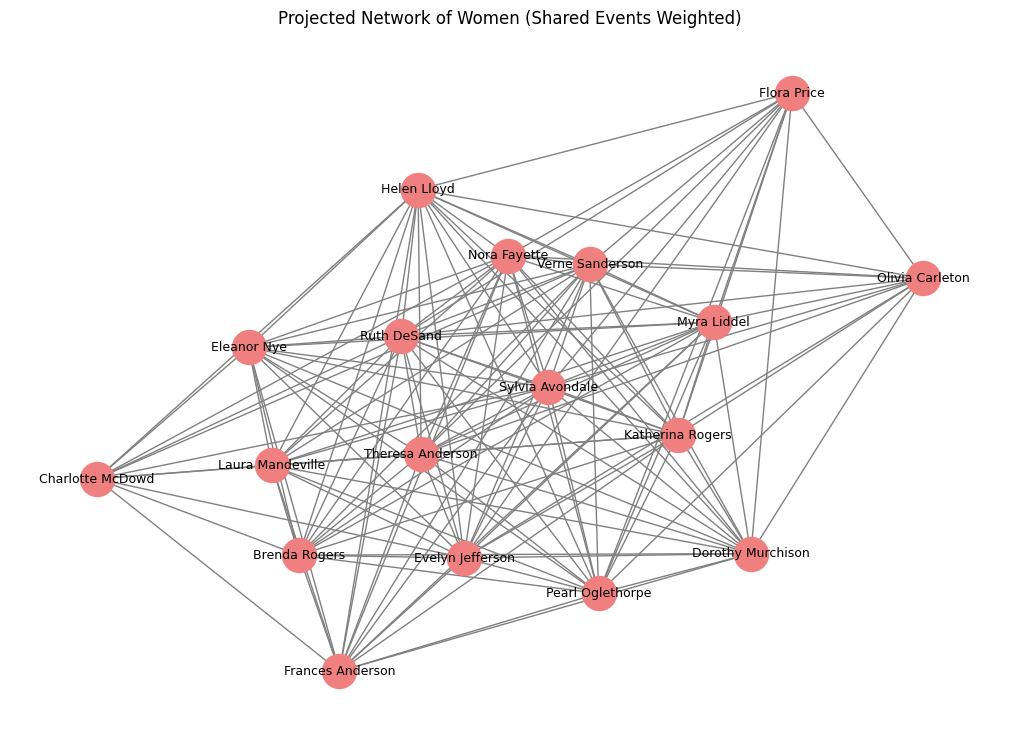

In [5]:
W = bipartite.weighted_projected_graph(G, women)
plt.figure(figsize=(10, 7))
nx.draw(W, with_labels=True, node_color='lightcoral', node_size=600,
        font_size=9, edge_color='gray')
plt.title("Projected Network of Women (Shared Events Weighted)")
plt.show()


This second plot shows the weighted projection of the bipartite graph onto the set of women, allowing us to observe the following:
- The network is highly interconnected, confirming that most women shared at least one event with many others.
- Central figures like Theresa Anderson, Sylvia Avondale, and Evelyn Jefferson are connected to nearly all other women, emphasizing their core role in the social network.
- The very dense mesh of edges reflects a strong cohesive group overall, with overlapping social interactions a higly interconnected connected network.


---

Now let's get some metrics to continue exploring the dataset:


In [6]:
import networkx as nx
from networkx.algorithms import bipartite

# load the Southern Women graph
G = nx.davis_southern_women_graph()
women = G.graph["top"]

# Project bipartite graph onto women
W = bipartite.projected_graph(G, women)

# computing metrics
degree_centrality = nx.degree_centrality(W)
betweenness_centrality = nx.betweenness_centrality(W, weight=None)
clustering = nx.clustering(W)

print(f"{'Name':<25} {'Degree':>8} {'Betweenness':>12} {'Clustering':>12}")
print("-" * 60)
for w in sorted(W.nodes()):
    print(f"{w:<25} "
          f"{degree_centrality[w]:8.3f} "
          f"{betweenness_centrality[w]:12.3f} "
          f"{clustering[w]:12.3f}")


Name                        Degree  Betweenness   Clustering
------------------------------------------------------------
Brenda Rogers                0.882        0.003        0.962
Charlotte McDowd             0.647        0.000        1.000
Dorothy Murchison            0.941        0.005        0.933
Eleanor Nye                  0.882        0.003        0.962
Evelyn Jefferson             1.000        0.010        0.897
Flora Price                  0.706        0.000        1.000
Frances Anderson             0.882        0.003        0.962
Helen Lloyd                  1.000        0.010        0.897
Katherina Rogers             0.941        0.005        0.933
Laura Mandeville             0.882        0.003        0.962
Myra Liddel                  0.941        0.005        0.933
Nora Fayette                 1.000        0.010        0.897
Olivia Carleton              0.706        0.000        1.000
Pearl Oglethorpe             0.941        0.005        0.933
Ruth DeSand             

### Degree Centrality
A score of 1.000 indicates that the woman co-attended at least one event with all other 17 women.

This includes Evelyn Jefferson, Helen Lloyd, Nora Fayette, Ruth DeSand, Sylvia Avondale, Theresa Anderson, and Verne Sanderson, indicating they are social hubs in the network.

Charlotte McDowd (0.647), Flora Price (0.706), and Olivia Carleton (0.706) have the lowest degree centrality, suggesting they are less socially embedded compared to others.


---

### Betweenness Centrality
This reflects how often a woman lies on the shortest paths between other women, a proxy for bridge or gatekeeping roles.

Evelyn Jefferson, Helen Lloyd, Nora Fayette, Ruth DeSand, Sylvia Avondale, Theresa Anderson, Verne Sanderson again, these women not only know many others but also serve as key conduits in the social structure.

Charlotte McDowd, Flora Price, Olivia Carleton although connected, they don't serve as bridges between others, indicating their relationships may be isolated to specific cliques.


---

### Clustering Coefficient
This metric captures the likelihood that two of a woman's connections are also connected to each other.

Charlotte McDowd, Flora Price, Olivia Carleton, although less connected overall, their limited networks are tightly knit. They likely belong to small, highly cohesive cliques.

Found among the most central figures like Theresa Anderson and Evelyn Jefferson. These women likely bridge multiple social groups, reducing their local cohesion but enhancing overall network connectivity.



---



## Overall Conclusions

A core group of women (Evelyn Jefferson, Sylvia Avondale, Verne Sanderson, etc.) dominate the social landscape, while other  like Charlotte McDowd and Flora Price form isolated clusters with perfect internal cohesion but little outward influence.
